In [ ]:
# for randomness
import random
random.seed(0)

import numpy as np
np.random.seed(0)


import tensorflow as tf
tf.random.set_seed(0)

**Import dependencies**

In [ ]:


import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
# Add this at the beginning of your notebook
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

**Data Curation**

In [63]:
# Load in fashion mnist dataset and categorize
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**see data types and sizes of trainingdata**

In [64]:
print(tf.__version__)


2.18.0


In [65]:
type(train_images)

numpy.ndarray

In [66]:
type(train_labels)

numpy.ndarray

In [67]:
print(len(train_images))

60000


In [68]:
print(len(train_labels))

60000


In [69]:
print(len(test_images))

10000


In [70]:
print(train_images[0].shape)

(28, 28)


In [71]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [72]:
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

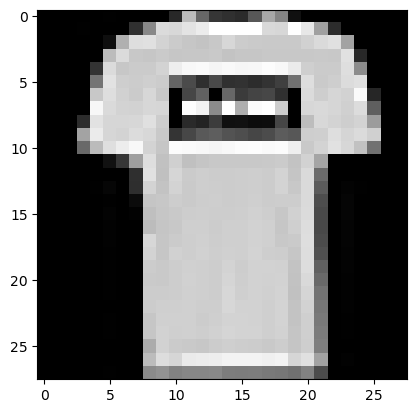

In [73]:
# Display an image from the dataset
plt.imshow(train_images[1], cmap='gray')
plt.show()

In [74]:
print(train_labels[0])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

In [75]:
# keep pixel values between 0 and 1. Grayscale
#normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

In [76]:
print(train_images[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

In [77]:
# Reshape images to a single color channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [78]:
train_images.shape

(60000, 28, 28, 1)

In [79]:
test_images.shape

(10000, 28, 28, 1)

In [80]:
#create variations of the training images to prevent overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
]
)

**Convolutional Neural Network**

In [81]:
# Convolutional Neural
model = models.Sequential([
    # Proper input layer definition
    
    # First Conv block
    layers.Conv2D(32, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    # Second Conv block
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    # Third Conv block
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Final layer with softmax activation
])

# Compile the model

# Add Dense layers on top
#flatten 3d features into a 1D vecter for dense layers.
model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
#learning optimization
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 1000,
    decay_rate =0.9

)
#Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',  #tracks validation loss
    patience = 5,           #wait 5 epochs for improvement
    restore_best_weights = True #keep best performing model
)

# Compile and train the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

**Model Training**

In [83]:
history = model.fit(
    train_images, train_labels, batch_size=32, epochs=5,
    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.7026 - loss: 0.8533 - val_accuracy: 0.8612 - val_loss: 0.3643
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8445 - loss: 0.4292 - val_accuracy: 0.8758 - val_loss: 0.3278
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8658 - loss: 0.3703 - val_accuracy: 0.8923 - val_loss: 0.2883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8762 - loss: 0.3401 - val_accuracy: 0.8994 - val_loss: 0.2763
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.8845 - loss: 0.3192 - val_accuracy: 0.9042 - val_loss: 0.2617


**Model Evaluation**

In [84]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.9042 - loss: 0.2617

Test accuracy: 0.90420001745224


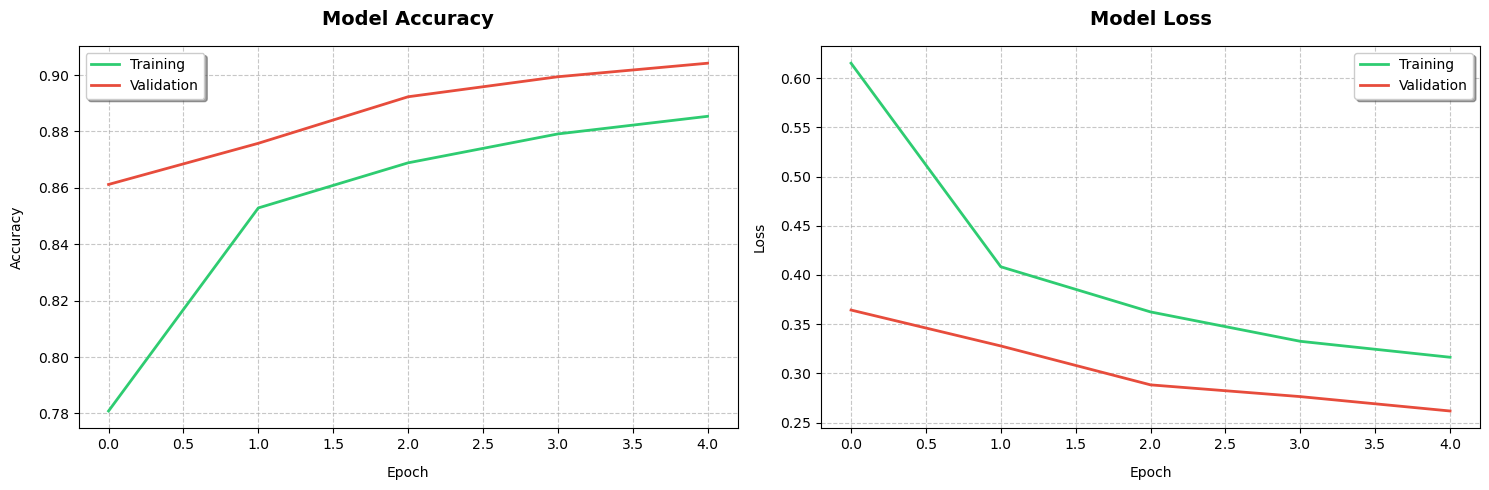


Final epoch metrics:
Training Accuracy: 0.8854
Validation Accuracy: 0.9042
Gap: -0.0188


In [85]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.patch.set_facecolor('white')

    colors = ['#2ecc71', '#e74c3c']


    # Accuracy plot
    ax1.plot(history.history['accuracy'], color=colors[0], linewidth=2, label='Training')
    ax1.plot(history.history['val_accuracy'], color=colors[1], linewidth=2, label='Validation')
    ax1.set_title('Model Accuracy', pad=15, fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', labelpad=10)
    ax1.set_ylabel('Accuracy', labelpad=10)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(frameon=True, fancybox=True, shadow=True)
    
    
    # Loss plot
    ax2.plot(history.history['loss'], color=colors[0], linewidth=2, label='Training')
    ax2.plot(history.history['val_loss'], color=colors[1], linewidth=2, label='Validation')
    ax2.set_title('Model Loss', pad=15, fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', labelpad=10)
    ax2.set_ylabel('Loss', labelpad=10)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.show()

# Plot the learning curves
plot_learning_curves(history)

# Print final metrics
print("\nFinal epoch metrics:")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Gap: {history.history['accuracy'][-1] - history.history['val_accuracy'][-1]:.4f}")



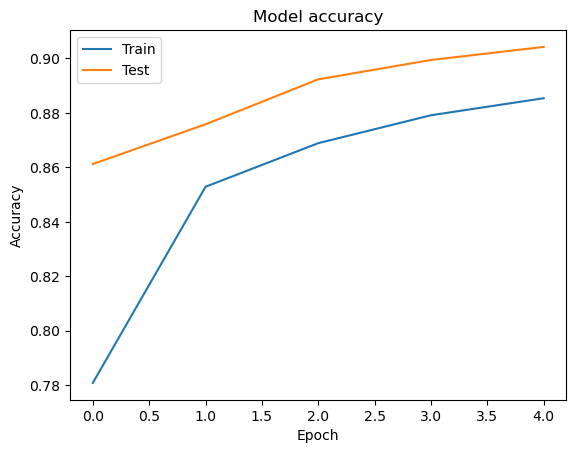

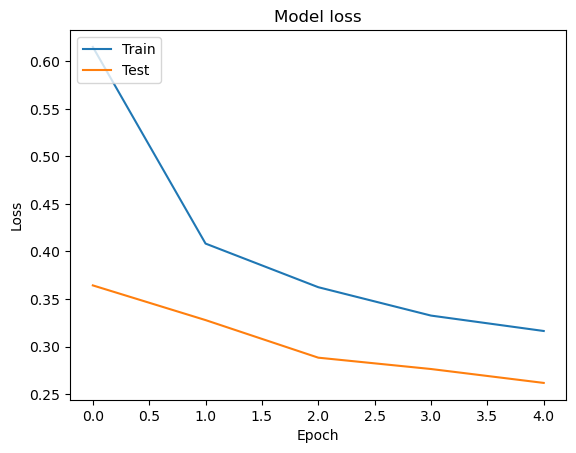

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


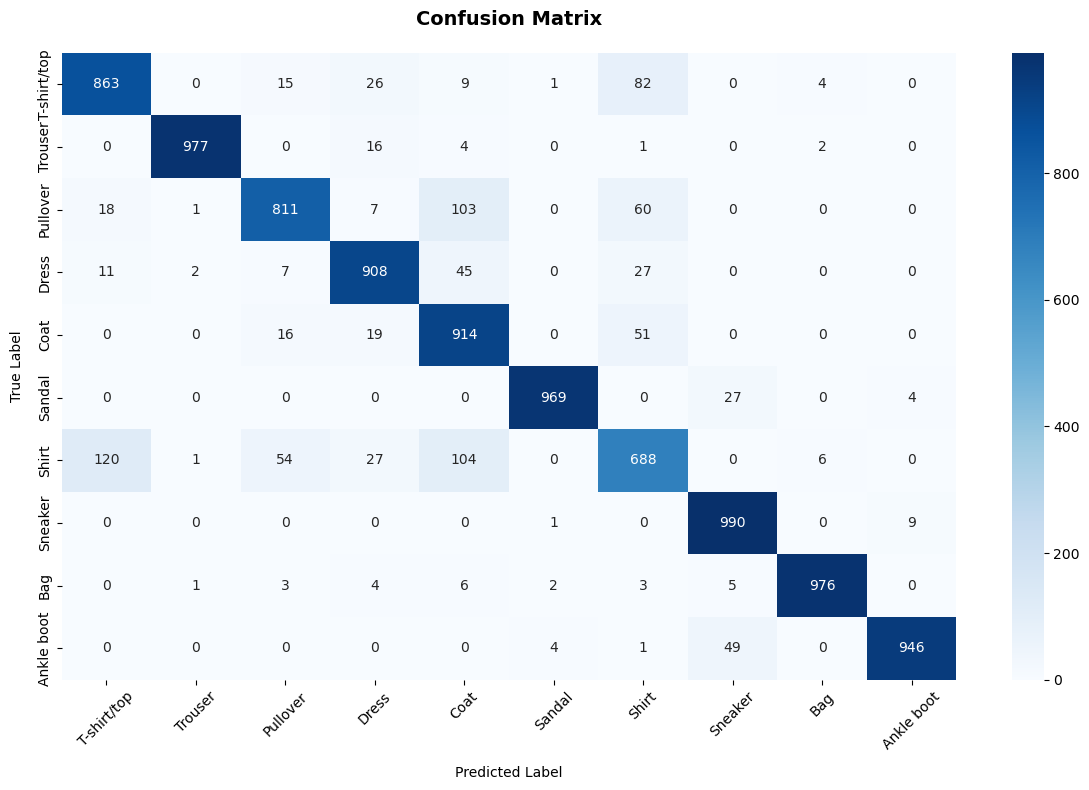


Per-class accuracy:
T-shirt/top: 0.8630
Trouser: 0.9770
Pullover: 0.8110
Dress: 0.9080
Coat: 0.9140
Sandal: 0.9690
Shirt: 0.6880
Sneaker: 0.9900
Bag: 0.9760
Ankle boot: 0.9460


In [86]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(test_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', labelpad=10)
plt.ylabel('True Label', labelpad=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class accuracy:")
for i, acc in enumerate(class_accuracy):
    print(f"{class_names[i]}: {acc:.4f}")

In [87]:
model.save('class_model.keras')